<a href="https://www.kaggle.com/code/jlcordoba/notebookc9b3daf08a?scriptVersionId=91907917" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

directoryv0 = '../input/tensorflow-great-barrier-reef/train_images/video_0/0.jpg'
Taxonomy = pd.read_csv('../input/birdclef-2022/eBird_Taxonomy_v2021.csv')
test = pd.read_csv('../input/birdclef-2022/test.csv')
train_metadata = pd.read_csv('../input/birdclef-2022/train_metadata.csv')
submission = pd.read_csv('../input/birdclef-2022/sample_submission.csv')
from os import path
from pydub import AudioSegment

# files
src = "../input/birdclef-2022/train_audio/afrsil1/XC175522.ogg"
dst = "/kaggle/working/XC175522.wav"

# convert mp3 to wav
sound = AudioSegment.from_ogg(src)
sound.export(dst, format="wav")


df_taxonomy = pd.DataFrame(Taxonomy)

df_test = pd.DataFrame(test)

df_train = pd.DataFrame(train_metadata)

df_submission = pd.DataFrame(submission)

df_taxonomy.head()







# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


In [2]:
df_test.head()

,row_id,file_id,bird,end_time
0,soundscape_1000170626_akiapo_5,soundscape_1000170626,akiapo,5
1,soundscape_1000170626_akiapo_10,soundscape_1000170626,akiapo,10
2,soundscape_1000170626_akiapo_15,soundscape_1000170626,akiapo,15


In [3]:
df_train.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


In [4]:
df_train.columns

Index(['primary_label', 'secondary_labels', 'type', 'latitude', 'longitude',
       'scientific_name', 'common_name', 'author', 'license', 'rating', 'time',
       'url', 'filename'],
      dtype='object')

In [5]:
df_train['filename'][16]

'akekee/XC174953.ogg'

In [6]:
df_submission.head()

,row_id,target
0,soundscape_1000170626_akiapo_5,False
1,soundscape_1000170626_akiapo_10,False
2,soundscape_1000170626_akiapo_15,False


In [7]:
with open('../input/birdclef-2022/scored_birds.json','r') as f:
    data = json.load(f)

In [8]:
print(data)

['akiapo', 'aniani', 'apapan', 'barpet', 'crehon', 'elepai', 'ercfra', 'hawama', 'hawcre', 'hawgoo', 'hawhaw', 'hawpet1', 'houfin', 'iiwi', 'jabwar', 'maupar', 'omao', 'puaioh', 'skylar', 'warwhe1', 'yefcan']


In [9]:
sample_rate, samples = wavfile.read('/kaggle/working/XC175522.wav')


In [10]:
len(samples)

1505472

In [11]:
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

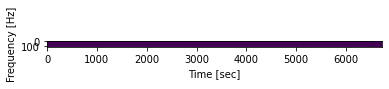

In [12]:
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

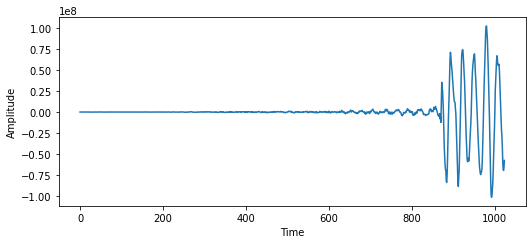

In [13]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
input_data = read("/kaggle/working/XC175522.wav")
audio = input_data[1]
plt.plot(audio[0:1024])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

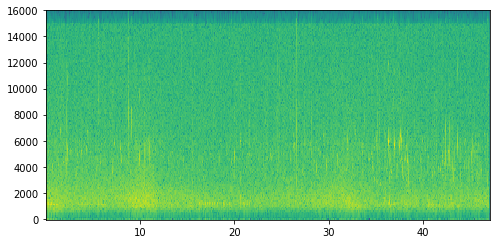

<Figure size 216x216 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sample_rate, samples = wavfile.read('/kaggle/working/XC175522.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram),shading = 'auto')
plt.figure(figsize = (3,3))

plt.show

In [15]:
frequencies

array([    0.,   125.,   250.,   375.,   500.,   625.,   750.,   875.,
        1000.,  1125.,  1250.,  1375.,  1500.,  1625.,  1750.,  1875.,
        2000.,  2125.,  2250.,  2375.,  2500.,  2625.,  2750.,  2875.,
        3000.,  3125.,  3250.,  3375.,  3500.,  3625.,  3750.,  3875.,
        4000.,  4125.,  4250.,  4375.,  4500.,  4625.,  4750.,  4875.,
        5000.,  5125.,  5250.,  5375.,  5500.,  5625.,  5750.,  5875.,
        6000.,  6125.,  6250.,  6375.,  6500.,  6625.,  6750.,  6875.,
        7000.,  7125.,  7250.,  7375.,  7500.,  7625.,  7750.,  7875.,
        8000.,  8125.,  8250.,  8375.,  8500.,  8625.,  8750.,  8875.,
        9000.,  9125.,  9250.,  9375.,  9500.,  9625.,  9750.,  9875.,
       10000., 10125., 10250., 10375., 10500., 10625., 10750., 10875.,
       11000., 11125., 11250., 11375., 11500., 11625., 11750., 11875.,
       12000., 12125., 12250., 12375., 12500., 12625., 12750., 12875.,
       13000., 13125., 13250., 13375., 13500., 13625., 13750., 13875.,
      

In [16]:
times

array([4.0000e-03, 1.1000e-02, 1.8000e-02, ..., 4.7023e+01, 4.7030e+01,
       4.7037e+01])

In [17]:
sample_rate

32000

In [18]:
samples

array([ 14659,   9876, -13141, ...,      1,      1,      0], dtype=int32)

In [19]:
spectrogram

array([[5.47270196e+03, 2.10094512e+06, 5.85559083e+06, ...,
        3.03801673e+04, 2.18619016e+04, 2.66511564e+03],
       [6.67315721e+03, 2.71467761e+06, 5.12757387e+06, ...,
        3.24076579e+06, 6.01890598e+03, 1.55173840e+05],
       [5.68838865e+04, 1.51183910e+07, 2.36952712e+06, ...,
        7.35358740e+04, 2.98662529e+04, 8.34031236e+03],
       ...,
       [9.40510328e+04, 1.20850025e+03, 1.11811608e+04, ...,
        4.23197435e+03, 6.83526958e+02, 3.51362385e+02],
       [5.97619483e+04, 7.60904169e+02, 1.80308088e+03, ...,
        9.71916787e+02, 1.55432177e+02, 1.14936360e+02],
       [1.00885127e+04, 4.61610880e+01, 1.71767197e+02, ...,
        9.28590262e+01, 3.12029452e+01, 2.75563600e+01]])

In [20]:
np.shape(spectrogram)

(129, 6720)

In [21]:
len(frequencies)

129

In [22]:
len(times)

6720